In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

In [28]:
season_kickoffs = {}
season_first_last = pd.read_csv('data/hardy/season_first_last.csv')
for index, r in season_first_last.iterrows():
    first_day = datetime.strptime(r['first'], "%Y-%m-%d")
    last_day = datetime.strptime(r['last'], "%Y-%m-%d")  # superbowl
    delta_days = last_day - first_day + timedelta(days=1)
    season_kickoffs[first_day.year] = first_day

def parse_date(date_text):
    date = datetime.strptime(date_text, "%Y-%m-%d")
    season = date.year
    if date.month < 6:
        season -= 1  # NFL season
    kickoff = season_kickoffs[season]
    delta_days = (date - kickoff).days
    week = 1 + (delta_days // 7)
    regular_week_count = (17 + 1) if season >= 2021 else (16 + 1)
        # 17 games since 2021
        
    days_since_1900 = (date - datetime(1900, 1, 1)).days
    regular = week >= 1 and week <= regular_week_count
    if regular:
        week_name = f"Week {week}"
    else:
        if week - regular_week_count == 1:
            week_name = 'Wild Card'
        elif week - regular_week_count == 2:
            week_name = 'Divisional Round'
        elif week - regular_week_count == 3:
            week_name = 'Conference Championship'
        elif week - regular_week_count == 5:
            week_name = 'Super Bowl'
        else:
            week_name = 'Unknown'
    
    return {
        'date': date_text,
        'season': season,
        'week': week,
        'weekday': date.weekday(),
        'weekday-name': date.strftime("%A"),
        'week-name': week_name,
        'regular': regular,  # regular season
        'absolute': days_since_1900,
    }

season_first_last = pd.read_csv('data/hardy/season_first_last.csv')
for index, r in season_first_last.iterrows():
    superbowl = parse_date(r['last'])  # superbowl
    # print(superbowl)

In [29]:
tabular_df = pd.read_csv('tabular.csv')
def elo_average(df, season):
    match = 0
    count = 0
    for i, r in df.iterrows():
        if parse_date(r['date'])['season'] != season:
            continue
        count += 1
        p = 1 if r['elo-home-last'] >= r['elo-away-last'] else 0
        if p == r['label']:
            match += 1
    prob = match / count
    print(f'season: {season}, prob = {prob}')
    return prob

def elo_probs():
    probs = []
    for season in range(2006, 2023):
        prob = elo_average(tabular_df, season)
        probs.append(prob)
    return probs

In [30]:
probs = elo_probs()

season: 2006, prob = 0.5730337078651685
season: 2007, prob = 0.6578947368421053
season: 2008, prob = 0.6217228464419475
season: 2009, prob = 0.6591760299625468
season: 2010, prob = 0.5864661654135338
season: 2011, prob = 0.6616541353383458
season: 2012, prob = 0.6142322097378277
season: 2013, prob = 0.602996254681648
season: 2014, prob = 0.6629213483146067
season: 2015, prob = 0.6404494382022472
season: 2016, prob = 0.6292134831460674
season: 2017, prob = 0.6441947565543071
season: 2018, prob = 0.5917602996254682
season: 2019, prob = 0.6367041198501873
season: 2020, prob = 0.6802973977695167
season: 2021, prob = 0.6491228070175439
season: 2022, prob = 0.6232394366197183


In [20]:
probs

[0.5730337078651685,
 0.6578947368421053,
 0.6217228464419475,
 0.6591760299625468,
 0.5864661654135338,
 0.6616541353383458,
 0.6142322097378277,
 0.602996254681648,
 0.6629213483146067,
 0.6404494382022472,
 0.6292134831460674,
 0.6441947565543071,
 0.5917602996254682,
 0.6367041198501873,
 0.6802973977695167,
 0.6491228070175439,
 0.6232394366197183]

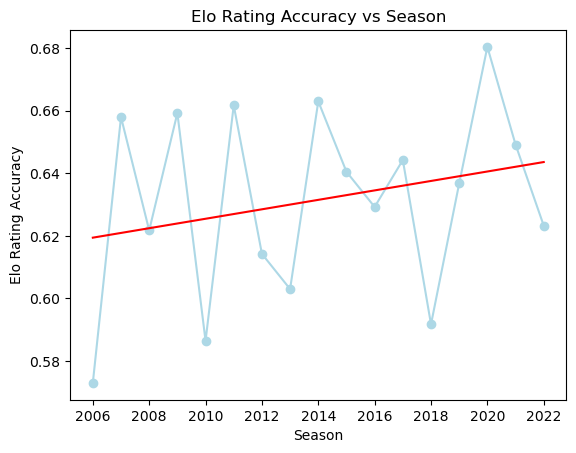

In [27]:
X = list(range(2006, 2023))
plt.plot(X, probs, 'o-', markersize=6, color='lightblue')
coefficients = np.polyfit(X, probs, 1)
regression_line = np.poly1d(coefficients)
plt.plot(X, regression_line(X), color='red', label='Regression Line')

plt.title('Elo Rating Accuracy vs Season')
plt.xlabel('Season')
plt.ylabel('Elo Rating Accuracy')
plt.show()

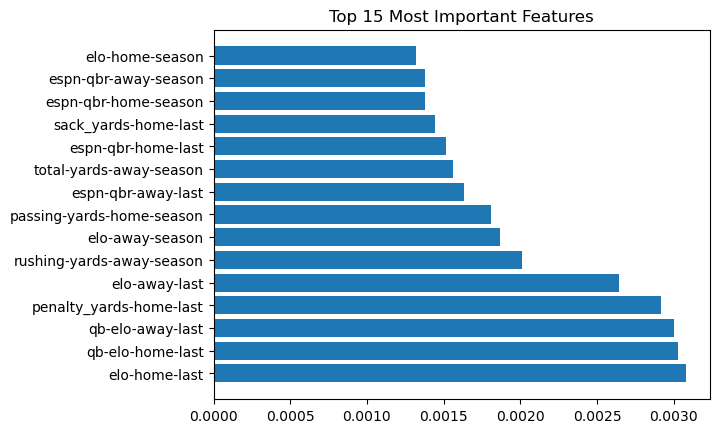

In [6]:
import matplotlib.pyplot as plt

sorted_importances = [('elo-home-last', 0.003079624051014309),
 ('qb-elo-home-last', 0.0030271564165243407),
 ('qb-elo-away-last', -0.0030005198298303486),
 ('penalty_yards-home-last', 0.0029153191143031373),
 ('elo-away-last', -0.0026460930965686138),
 ('rushing-yards-away-season', -0.002008675686293668),
 ('elo-away-season', 0.001866205368820142),
 ('passing-yards-home-season', 0.0018053789026190887),
 ('espn-qbr-away-last', -0.001632694289305831),
 ('total-yards-away-season', -0.001563311840913815),
 ('espn-qbr-home-last', 0.0015170538016750917),
 ('sack_yards-home-last', -0.0014459359459224339),
 ('espn-qbr-home-season', 0.001378852665974205),
 ('espn-qbr-away-season', -0.0013773497374755302),
 ('elo-home-season', -0.0013214985920265497),
 ('penalty_yards-home-season', -0.001186286456060131),
 ('rushing-yards-away-last-season', -0.0011731292037321227),
 ('total-yards-home-last-season', -0.0011220598435786246),
 ('rushing-yards-home-season', -0.001022182923258277),
 ('sack_yards-away-season', 0.0009599486713684651)]
 
top_features = [feature for feature, importance in sorted_importances[:15]]
top_importances = [abs(importance) for feature, importance in sorted_importances[:15]]
plt.barh(top_features, top_importances)
plt.title('Top 15 Most Important Features')
plt.show()